# Creating a first stimulus

This tutorial introduces the basics of stimulus generation with **`stimupy`**
and shows how to create your first stimulus.
At its core, `stimupy` provides a large set of *functions*
that each draw a specific (visual) component or image.

In this part of the tutorial,
we'll look at three examples of such stimulus-generating functions.

```{tip}
You can launch this tutorial as an interactive Jupyter Notebook on Binder -- see the Binder icon at the top of the page.
```

---


## Example 1: A Gabor

One of the most common stimuli in vision science is the **Gabor patch**
-- a sinusoidal grating enveloped by a Gaussian.

In `stimupy`, Gabors are implemented in the {py:mod}`stimupy.stimuli.gabors` module.
So, to use this function, we must first `import` it.
Then, we call it function with some specification for several parameters,
which hopefully make intuitive sense:

In [1]:
from stimupy.stimuli.gabors import gabor

stim = gabor(visual_size=4, ppd=50, sigma=0.5, frequency=4, rotation=45, phase_shift=0)

### Resulting stimulus
The resulting stimulus is a Python {py:class}`dict`,
which contains several parts:
- `"img"` -- a {py:class}`numpy.ndarray` containing the stimulus image.
- All the parameters used to generate the stimulus
- Space for any additional metadata you wish to add

In [2]:
print(stim.keys())

dict_keys(['img', 'grating_mask', 'visual_size', 'ppd', 'shape', 'frequency', 'n_phases', 'phase_width', 'period', 'rotation', 'phase_shift', 'round_phase_width', 'origin', 'distance_metric', 'sigma', 'gaussian_mask', 'intensities'])


The `"img"` is of course the most important:
this is a 2D {py:class}`numpy.ndarray`, representing an array of pixels.
The value of each array element is the intensity of the pixel,
in range $[0,1]$ ('black' to 'white').

In [3]:
print(stim["img"])

[[0.5        0.50000002 0.50000005 ... 0.50000007 0.50000007 0.50000007]
 [0.49999998 0.5        0.50000003 ... 0.50000006 0.50000007 0.50000007]
 [0.49999995 0.49999997 0.5        ... 0.50000002 0.50000006 0.50000007]
 ...
 [0.49999993 0.49999994 0.49999998 ... 0.5        0.50000004 0.50000007]
 [0.49999993 0.49999993 0.49999994 ... 0.49999996 0.5        0.50000003]
 [0.49999993 0.49999993 0.49999993 ... 0.49999993 0.49999997 0.5       ]]


You can use `stimupy`s plotting routine to plot the stimulus:

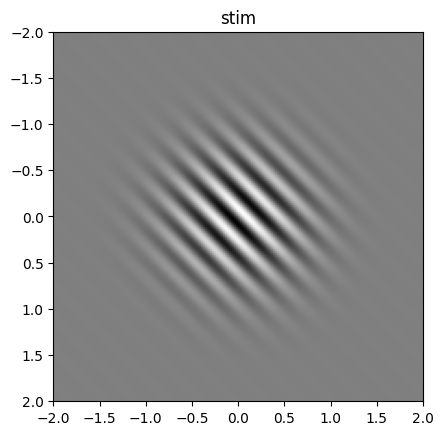

<Axes: title={'center': 'stim'}>

In [4]:
from stimupy.utils import plot_stim

plot_stim(stim)

Alternatively, since the stimulus is a {py:class}`numpy.ndarray`,
you can use your preferred way of showing a {py:class}`numpy.ndarray` on the `stim["img"]` array,
e.g. {py:func}`matplotlib.pyplot.imshow()`:

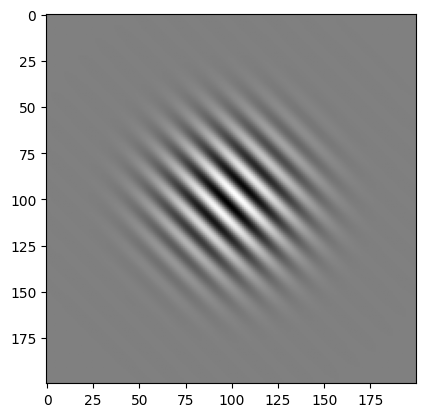

In [5]:
import matplotlib.pyplot as plt

plt.imshow(stim["img"], cmap="gray")
plt.show()

### Parametrization
To generate the Gabor, we specified some relevant parameters:
- **`visual_size`** -- image size (degrees)
- **`ppd`** -- pixels per degree (resolution)
- **`sigma`** -- size of Gaussian envelope (degrees)
- **`frequency`** -- cycles per degree
- **`rotation`** -- orientation in degrees
- **`phase_shift`** -- phase offset in degrees

The `gabor` function takes many more arguments and parameters though.
All are listed in the documentation, which can be viewed both
here online ( {py:func}`stimupy.stimuli.gabors.gabor` )
and from within Python:

In [6]:
help(gabor)

Help on function gabor in module stimupy.stimuli.gabors:

gabor(
    visual_size=None,
    ppd=None,
    shape=None,
    frequency=None,
    n_bars=None,
    bar_width=None,
    period='ignore',
    rotation=0.0,
    phase_shift=0,
    intensities=(0.0, 1.0),
    origin='center',
    round_phase_width=False,
    sigma=None
)
    Draw a Gabor: a sinewave grating in a Gaussian envelope

    Parameters
    ----------
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of image, in degrees
    ppd : Sequence[Number, Number], Number, or None (default)
        pixels per degree [vertical, horizontal]
    shape : Sequence[Number, Number], Number, or None (default)
        shape [height, width] of image, in pixels
    frequency : Number, or None (default)
        spatial frequency of grating, in cycles per degree visual angle
    n_bars : Number, or None (default)
        number of bars in the grating
    bar_width : Number, or None (defaul

Any parameter that you don't specify either uses its default value,
or a value that can be deduced from other specified parameters.
All the parameters -- both those we specified, and the ones determined by stimupy --
are part of the output stimulus-{py:class}`dict`:

In [7]:
print(stim.keys())
print(print(f"{stim['intensities']=}"))
print(print(f"{stim['phase_width']=}"))

dict_keys(['img', 'grating_mask', 'visual_size', 'ppd', 'shape', 'frequency', 'n_phases', 'phase_width', 'period', 'rotation', 'phase_shift', 'round_phase_width', 'origin', 'distance_metric', 'sigma', 'gaussian_mask', 'intensities'])
stim['intensities']=(0.0, 1.0)
None
stim['phase_width']=0.125
None


## Example 2: A rectangle

`stimupy` also provides basic geometric shapes,
located in the {py:mod}`stimupy.components.shapes` module.
Generating this follows the same steps as the Gabor:

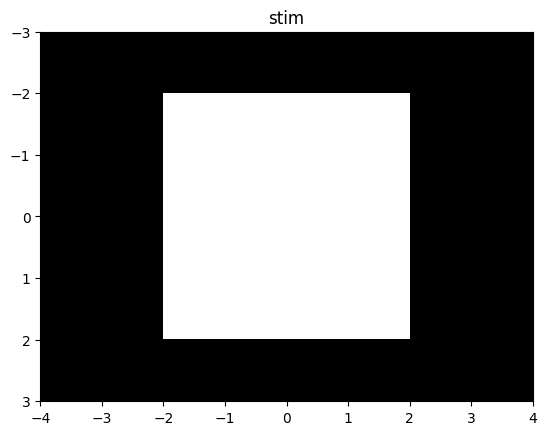

<Axes: title={'center': 'stim'}>

In [8]:
from stimupy.components import shapes

stim = shapes.rectangle(visual_size=(6,8), ppd=10, rectangle_size=(4,4))
plot_stim(stim)

Note that here we used some arguments that we also used for the Gabor
(`visual_size` and `ppd`),
and some that are specific to the rectangle function.
Since a rectangle is different from a Gabor, we can specify different aspects of it, e.g.:
- **`rectangle_size`** -- width × height (degrees)
- **`rectangle_position`** -- position from top-left corner (degrees)
- **`intensity_rectangle`** -- brightness of rectangle
- **`intensity_background`** -- brightness of background

Example with different size and intensity:

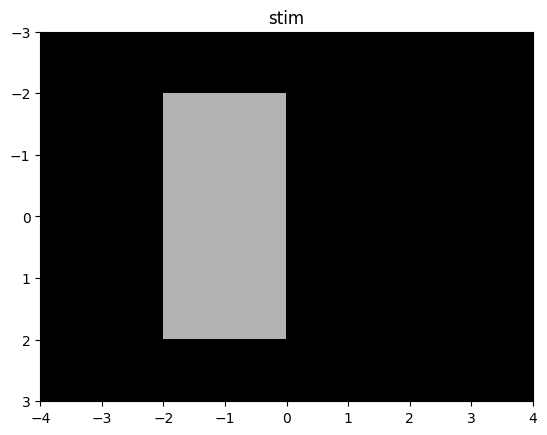

<Axes: title={'center': 'stim'}>

In [9]:
stim = shapes.rectangle(
    visual_size=(6,8),
    ppd=10,
    rectangle_size=(4,2),
    rectangle_position=(1,2),
    intensity_rectangle=.7
)

plot_stim(stim)

---


## Example 3: White noise

Another classic stimulus is **white noise** -- an array of random pixel intensities.  
White noise is provided in {py:mod}`stimupy.noises.whites`:

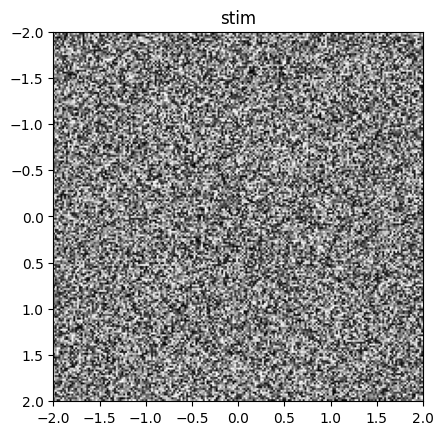

<Axes: title={'center': 'stim'}>

In [10]:
from stimupy.noises.whites import white

stim = white(visual_size=4, ppd=50)
plot_stim(stim)

For this stimulus, we specified only the image size parameters `visual_size and `ppd`.
The are other parameters for this function, for which stimupy used the default values.


---

## In general

A `stimupy` stimulus is:
1. A Python {py:class}`dict`
2. Containing `"img"` as a {py:class}`numpy.ndarray`
3. Including all parameters used to generate it

**Advantages**:
- Self-contained and reproducible
- Compatible with any NumPy-based workflow
- Easy to [use](../howtos/use_stimulus/use.md): 
  [save](../howtos/use_stimulus/export.md),
  plot, and [share](../howtos/use_stimulus/share.md)

```{caution}
Once created, anything in the resulting stimulus-{py:class}`dict` can be modified by the user.
`stimupy` does not enforce any post-creation validation.
Thus, you can change, e.g., the value of `ppd` in the stimulus-{py:class}`dict`
but this does not alter the stimulus.
Instead, it would mean the image and parameters in the stimulus-{py:class}`dict` are
no longer congruent
Handle with care!
```

### Stimulus parameters

All `stimupy` stimulus-functions require and take multiple arguments. These control, for example:

- **Image size & resolution**
  - `visual_size`, `ppd`, or `shape` (pixels)
  - these are over-complete: because of their interdependency, you only need to specify 2 of 3.
  - for more information, see the User Guide on [](../user_guide/resolution)
- **Stimulus-specific geometry**
  - e.g., `sigma`, `frequency` for Gabor
  - e.g., `rectangle_size` for rectangles
- **Photometric properties**
  - e.g., `intensities` for Gabor
  - e.g., `intensity_rectangle` for rectangles
  - all `stimupy` stimuli by default are in the range $[0, 1]$

You can check a function's parameters in the [function reference](../reference/api) or via Python's `help()`:

In [11]:
help(gabor)

Help on function gabor in module stimupy.stimuli.gabors:

gabor(
    visual_size=None,
    ppd=None,
    shape=None,
    frequency=None,
    n_bars=None,
    bar_width=None,
    period='ignore',
    rotation=0.0,
    phase_shift=0,
    intensities=(0.0, 1.0),
    origin='center',
    round_phase_width=False,
    sigma=None
)
    Draw a Gabor: a sinewave grating in a Gaussian envelope

    Parameters
    ----------
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of image, in degrees
    ppd : Sequence[Number, Number], Number, or None (default)
        pixels per degree [vertical, horizontal]
    shape : Sequence[Number, Number], Number, or None (default)
        shape [height, width] of image, in pixels
    frequency : Number, or None (default)
        spatial frequency of grating, in cycles per degree visual angle
    n_bars : Number, or None (default)
        number of bars in the grating
    bar_width : Number, or None (defaul